In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

LOADING THE MNSIT DATASET

In [2]:
# Load the MNIST dataset
mnist = tf.keras.datasets.mnist

# Split the data into training and testing sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images to the range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Print the shapes of the filtered datasets
print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing data shape: {x_test.shape}")
print(f"Testing labels shape: {y_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Testing data shape: (10000, 28, 28)
Testing labels shape: (10000,)


In [3]:
print("The first element of X : ", x_train[0] )

The first element of X :  [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.     

In [4]:
print(y_train[0])
print(y_train[-1])

5
8


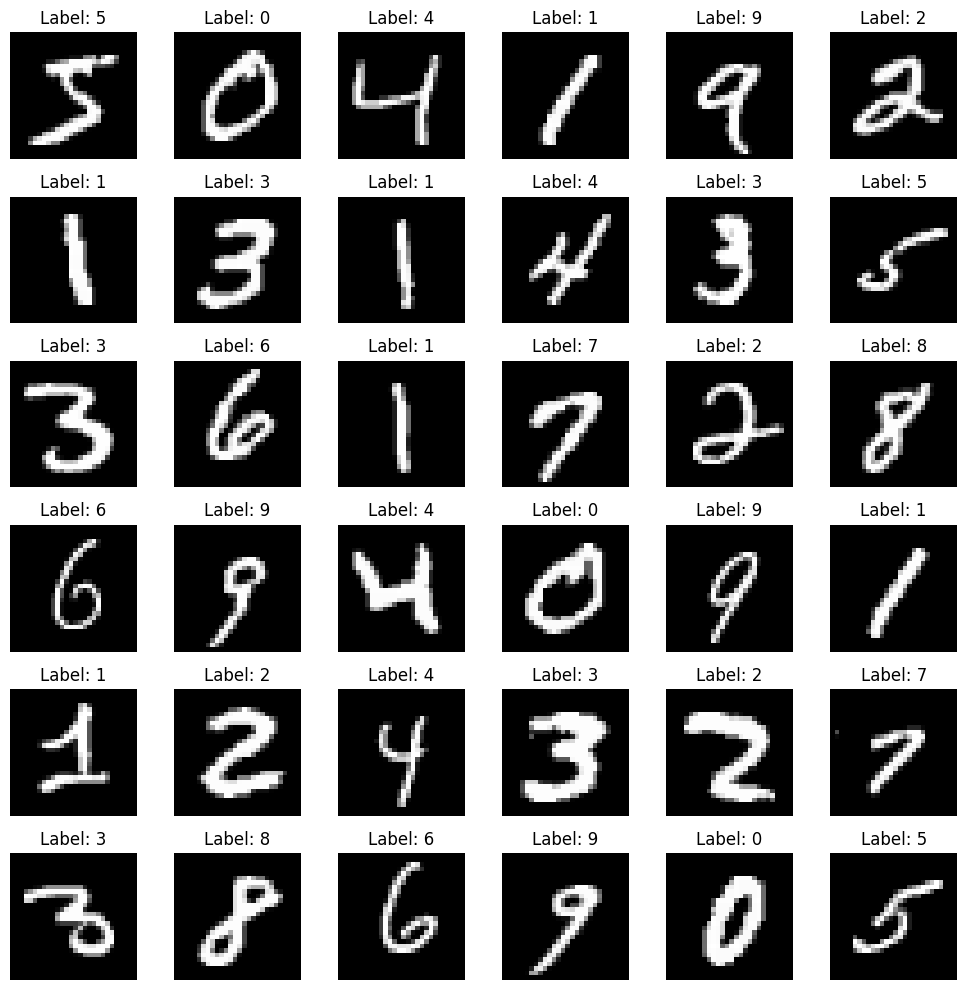

In [5]:
def plot_images(images, labels, rows=4, cols=4):
    fig, axes = plt.subplots(rows, cols, figsize=(10, 10))
    axes = axes.flatten()
    for i in range(min(len(images), rows * cols)):  # Limit to the number of available images
        axes[i].imshow(images[i], cmap='gray')
        axes[i].set_title(f"Label: {labels[i]}")
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

# Example: Plotting a subset of the filtered training images
plot_images(x_train[:36], y_train[:36], rows=6, cols=6)  # Adjust rows and cols as needed

In [6]:
# Flatten the images from 28x28 to 784
x_train_flattened = x_train.reshape(-1, 784)
x_test_flattened = x_test.reshape(-1, 784)

In [7]:
model = Sequential([
    Dense(25, activation='relu', input_shape=(784,)),
    Dense(15, activation='relu'),
    Dense(10, activation='linear')
])

model.compile(
    optimizer = tf.keras.optimizers.Adam(0.001),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model.fit(x_train_flattened, y_train, epochs = 100, validation_data=(x_test_flattened, y_test))

c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 832us/step - accuracy: 0.7955 - loss: 0.6932 - val_accuracy: 0.9369 - val_loss: 0.2243
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 680us/step - accuracy: 0.9416 - loss: 0.2051 - val_accuracy: 0.9488 - val_loss: 0.1758
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 750us/step - accuracy: 0.9525 - loss: 0.1593 - val_accuracy: 0.9501 - val_loss: 0.1697
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 740us/step - accuracy: 0.9606 - loss: 0.1344 - val_accuracy: 0.9594 - val_loss: 0.1416
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 685us/step - accuracy: 0.9638 - loss: 0.1254 - val_accuracy: 0.9596 - val_loss: 0.1397
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 708us/step - accuracy: 0.9666 - loss: 0.1136 - val_accuracy: 0.9593 - val_loss: 0.1412
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 721us/step - accuracy: 0.9699 - loss: 0.1022 - val_accuracy: 0.9618 - val_loss: 0.1394
Epoch 8/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 740us/step - accuracy: 

In [8]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test_flattened, y_test)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step - accuracy: 0.9573 - loss: 0.3863
Test accuracy: 0.9614999890327454


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step
Predicted labels for first 10 test images: [7 2 1 0 4 1 4 9 5 9]
Actual labels for first 10 test images: [7 2 1 0 4 1 4 9 5 9]


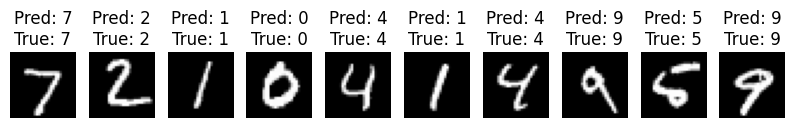

In [9]:
# Predict on the test set
predictions = model.predict(x_test_flattened)

# Since the output layer is using linear activation, we need to apply the softmax function manually
predicted_probabilities = tf.nn.softmax(predictions).numpy()

# Convert predictions to class labels
predicted_labels = np.argmax(predicted_probabilities, axis=1)

# Print the first 10 predictions
print(f'Predicted labels for first 10 test images: {predicted_labels[:10]}')
print(f'Actual labels for first 10 test images: {y_test[:10]}')

# Plot the first 10 test images with their predicted and actual labels
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f'Pred: {predicted_labels[i]}\nTrue: {y_test[i]}')
    plt.axis('off')
plt.show()